# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

##### Nicolas Treimun Cardenas

In [1]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [2]:
clus <-Mclust(datos,4)
summary(clus)
#plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 


El método de Mclust se basa en Gaussian Mixture Models, los cuales son estimados por algoritmos EM (Expectation-maximization). Su funcionalidad es elegir automáticamente el mejor número de componentes y parámetros de covarianza gracias a los Criterios de Información Bayesianos (BIC). 
        - Como input de pasaremos nuestros datos, y en este caso estamos tambien asignando la cantidad de componentes en los cuales queremos clasificar nuestro dataset (4)
        -Como output podemos observar el número de componentes los cuales modelan de manera óptima nuestros datos (esto si no lo hemos definido de manera manual) y la cantidad de elementos pertenecientes a dichos componentes, además de datos correspondientes a log-likelihood, n, df , BIC e ICL (explicados en la siguiente celda).


        


            - Call: La llamada coincidente (ejecutada).
            - Data: Matriz con datos de entrada.
            - ModelName: Un string que denota el modelo en el cual se produce el BIC óptimo.
            - n: Numero de observaciones en la data
            - d: dimension de la data
            - G: El numero optimo de 'Mixture components'
            - BIC: todos los valores BIC
            - loglik: 
            - df: numero de parametros estimados
            - bic: valores BIC del modelo seleccionado 
            - icl: valores ICL del modelo selecionado
            - hypvol: parametros de hypervolume para el ruido de compoentes si es que requiere (sino, es null) 
            - parameters: proporción, media y varianza.
            - z: Una matriz la cual nos indica que para la entrada [i,k] la probabilidad de la observacion i en el data test pertenezca a la clase k. 
            - classification: la clasificacion correspondiente a z.
            - uncertainty: la incertidumbre asociada con la clasificacion.

  Podemos identificar que en este caso al haber seteado la cantidad de componentes en 4 al ejecutar el método obtendremos la mejor distribución posible de nuestros datos bajo estos parametros. Se puede apreciar en los gráficos los elementos pertenecientes a cada grupo, así mismo en la "Clsutering Table" la cantidad de elementos pertenecientes a cada componente.
    Luego con "centers" podemos apreciar la media de cada característica perteneciente a cada uno de los 4 grupos. Tambien podemos apreciar en "cl" la clasificación en la cual se ha encasillado cada animal en el dataset (1 a 4).

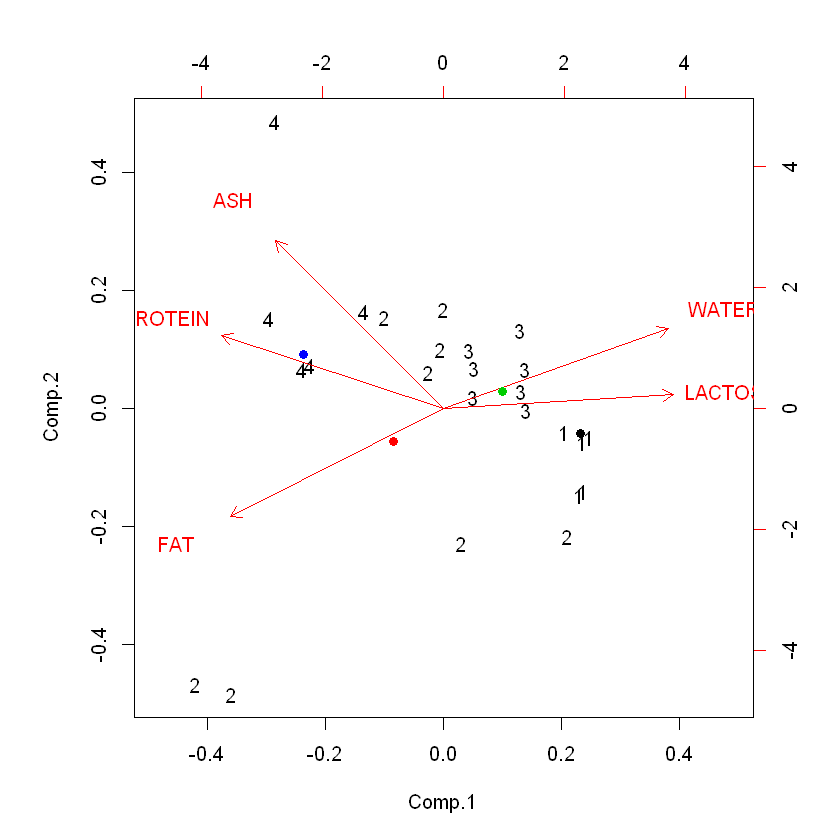

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

Ejercicio 2: 

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

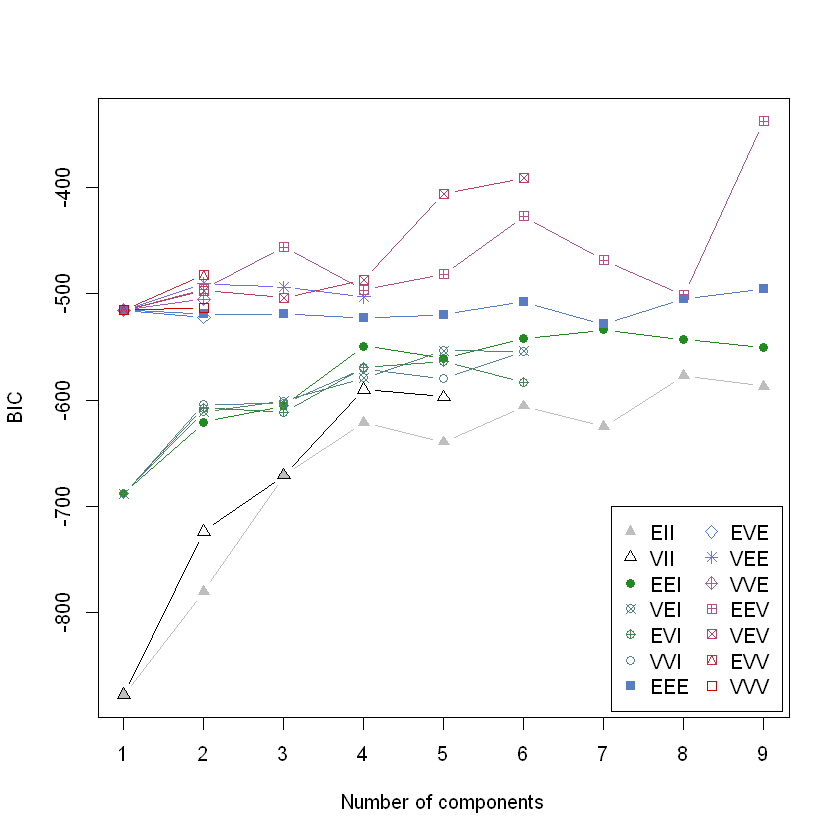

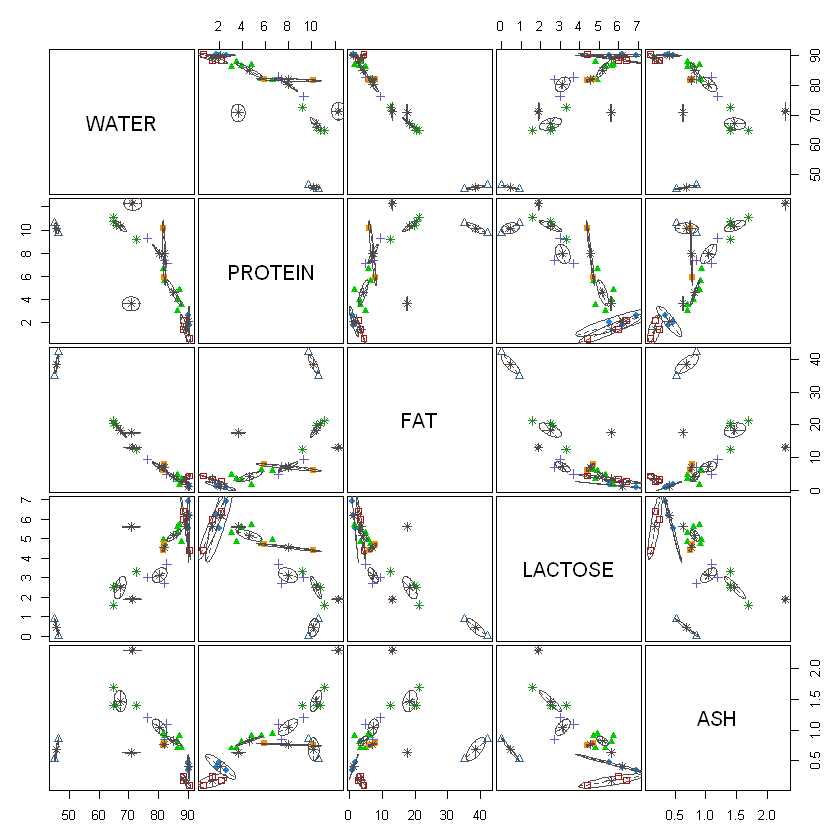

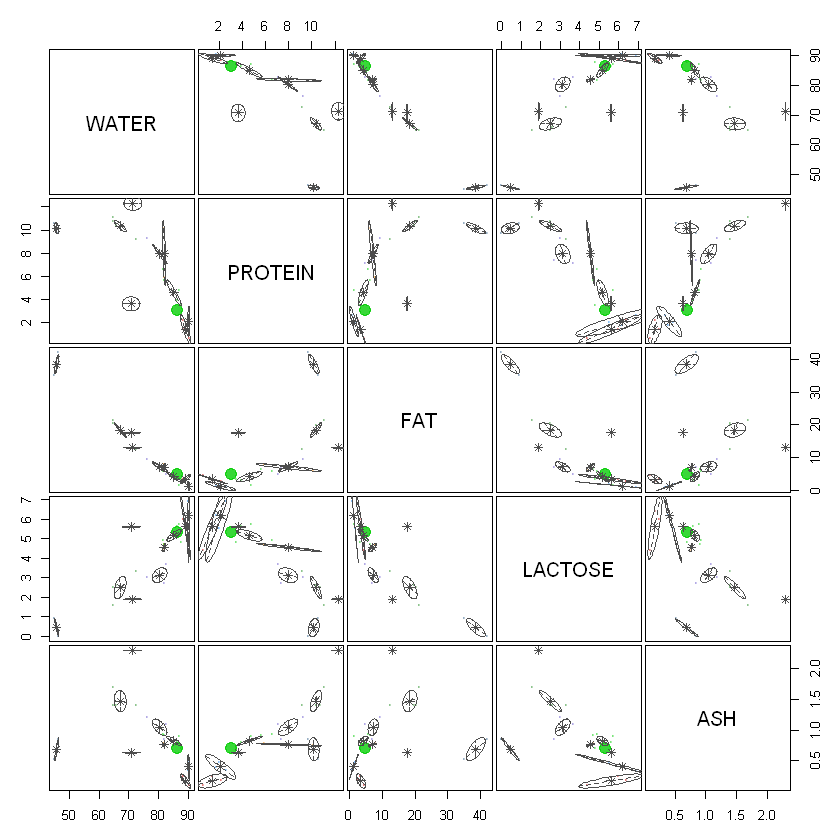

WATER,PROTEIN,FAT,LACTOSE,ASH
90.13333,2.100000,1.400000,6.200000,0.4066667
89.10000,1.400000,3.566667,5.600000,0.1733333
85.15000,4.566667,4.233333,5.166667,0.8250000
80.33333,7.933333,7.266667,3.133333,1.0500000
81.85000,8.000000,7.100000,4.550000,0.7650000
70.70000,3.600000,17.600000,5.600000,0.6300000
71.30000,12.300000,13.100000,1.900000,2.3000000
67.00000,10.350000,18.450000,2.500000,1.4750000
45.65000,10.150000,38.450000,0.450000,0.6900000


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          2          2          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         5          4          5          3          3          1          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          4          6          7          8          8 
  REINDEER      WHALE       SEAL    DOLPHIN 
         8          8          9          9

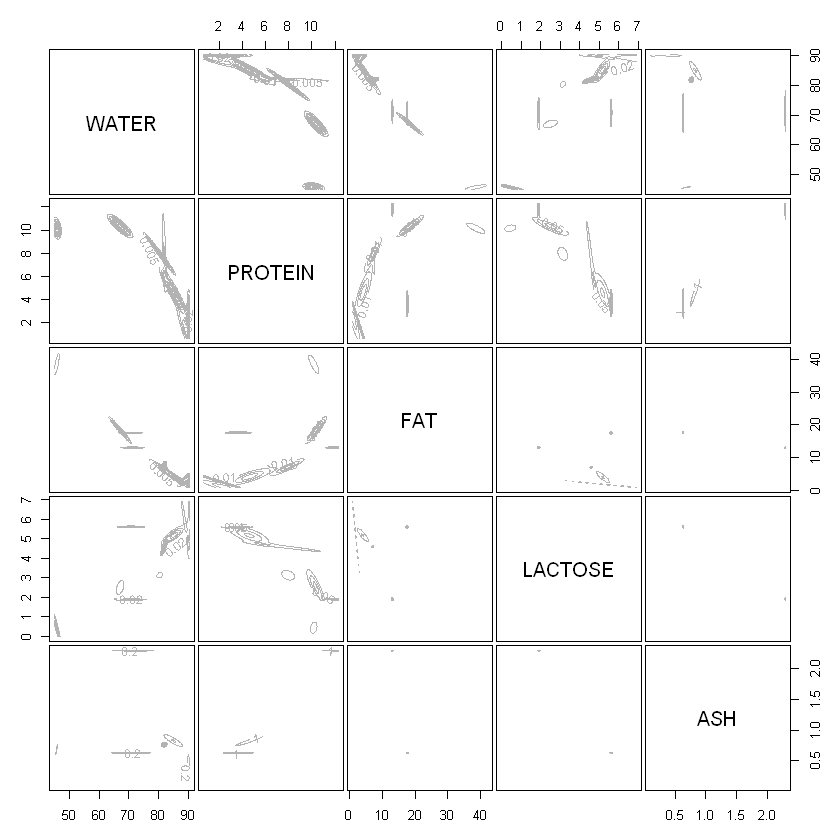

In [4]:
clus2 <-Mclust(datos)
summary(clus2)
plot(clus2)

cl2 <- clus2$classification
centers2 <- t(clus2$parameters$mean)
centers2
cl2

    2.a)R: Para este caso el número óptimo de grupos es de 9 debido a que con esa cantidad obtenemos el BIC máximo global, pero como buena práctica utilizaremos el primero máximo local que es 3. 

    2.b)R: La diferencia existente entre K-means y este algoritmo es que k-means nos arroja como cantidad de grupos óptimos un total de 3, mientras que al aplicar Mclust obtendremos 9.  Comparando los gráficos de cada método se puede observar que los grupos arrojados por Mclust están mejor definidos, ya que existen casos utilizando K-means en donde hay elementos que estan muy dispersos pero aun así se encuentran en un mismo grupo, así mismo utilizando Mclust existe una relación más lógica entre los animales agrupados. 

#### Algoritmos Jerárquicos

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

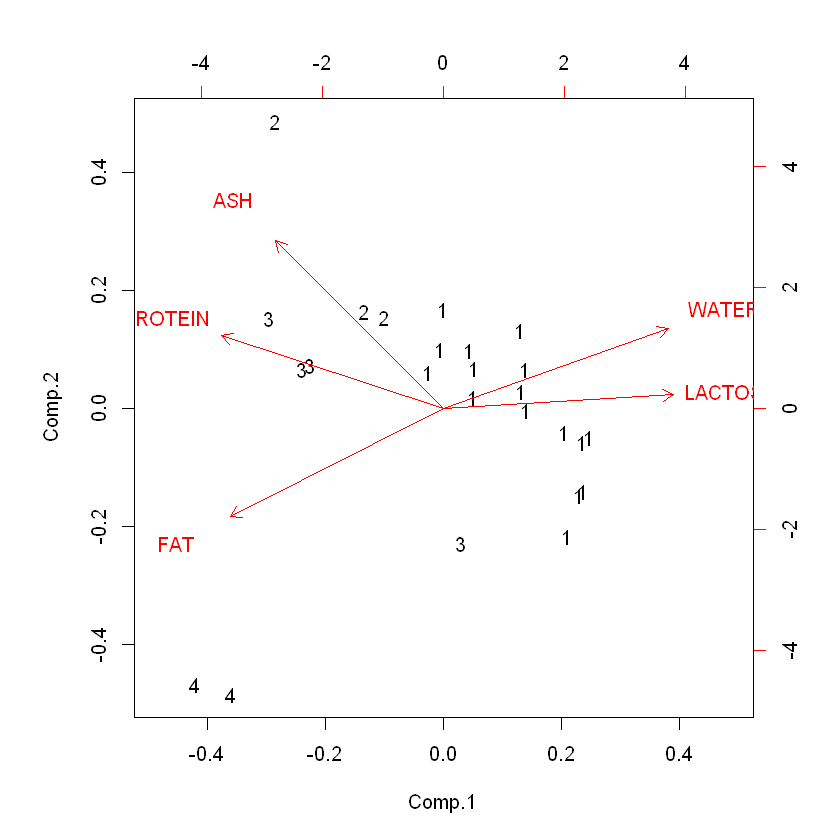

In [5]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

Ejercicio 3: 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

    3.a)R: Esta función realiza un análisis de agrupamiento jerárquico utilizando un conjunto de diferencias para los n objetos que se agrupan. Inicialmente, cada objeto se asigna a su propio grupo y luego el algoritmo procede de forma iterativa, en cada etapa uniendo los dos grupos más similares, continuando hasta que haya un solo grupo. En cada etapa, las distancias entre grupos se vuelven a calcular mediante la fórmula de actualización de disparidad de Lance-Williams de acuerdo con el método de agrupación particular que se utiliza.

    3.b)R: El gráfico nos muestra los mismos datos que K-mean, simplemente intercambiando la etiqueta de utilizan dos de los grupos (2 y 4).

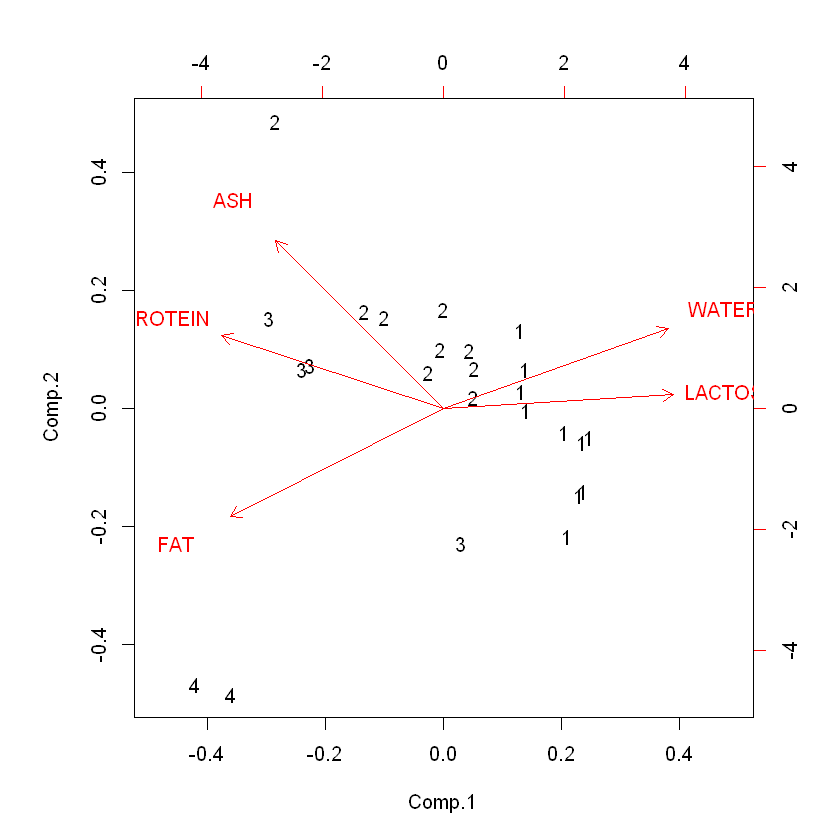

In [6]:
res3 <- hclust(dist(datos), method = "median")
biplot(res, xlabs= cutree(res3,4))

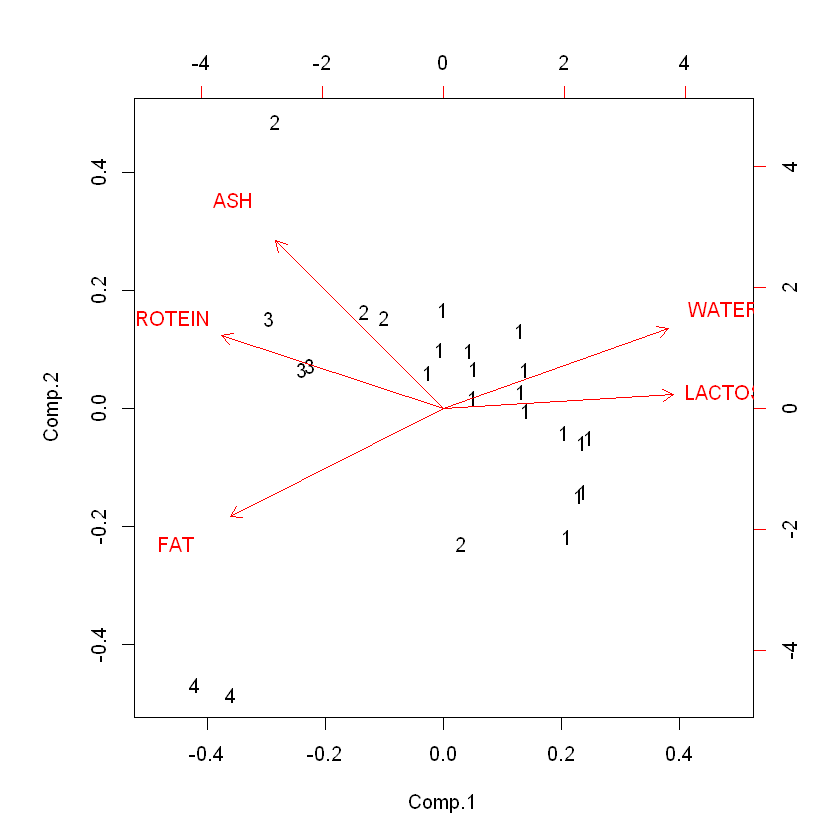

In [7]:
res4 <- hclust(dist(datos), method = "centroid")
biplot(res, xlabs= cutree(res4,4))

    3.c)R: Se observa que al utilizar "median" varios elementos pertenecientes al grupo 1 pasan al grupo 2 (comparado a la por defecto), mientras que al utilizar "centroid" obtenemos casi el mismo resultado que pero cambia un valor del grupo 3 al grupo 2 (elemento más alejado). Estos cambios los podemos asociar a que al ejecutarse los métodos las características van tomando mas peso, por ejemplo podemos identificar que al utilizar el método "centroid" los elementos "centrales" se inclinan hacia el grupo 1, mientras que si aplicamos "median", los elementos de 1 estarán más ligados hacia lactoza y agua, mientras que los centrales serán categorizados en el grupo 2.

Ejercicio 4: 

a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a). Discuta sus resultados.

    4a)R: Los métodos se implementarán a continuación.
#### K-mean

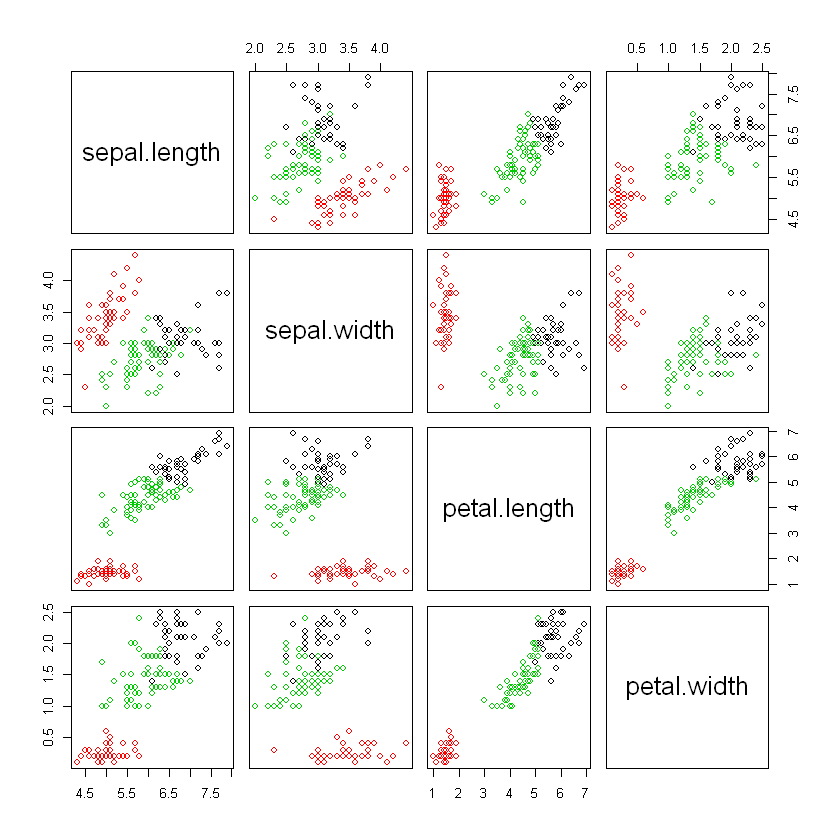

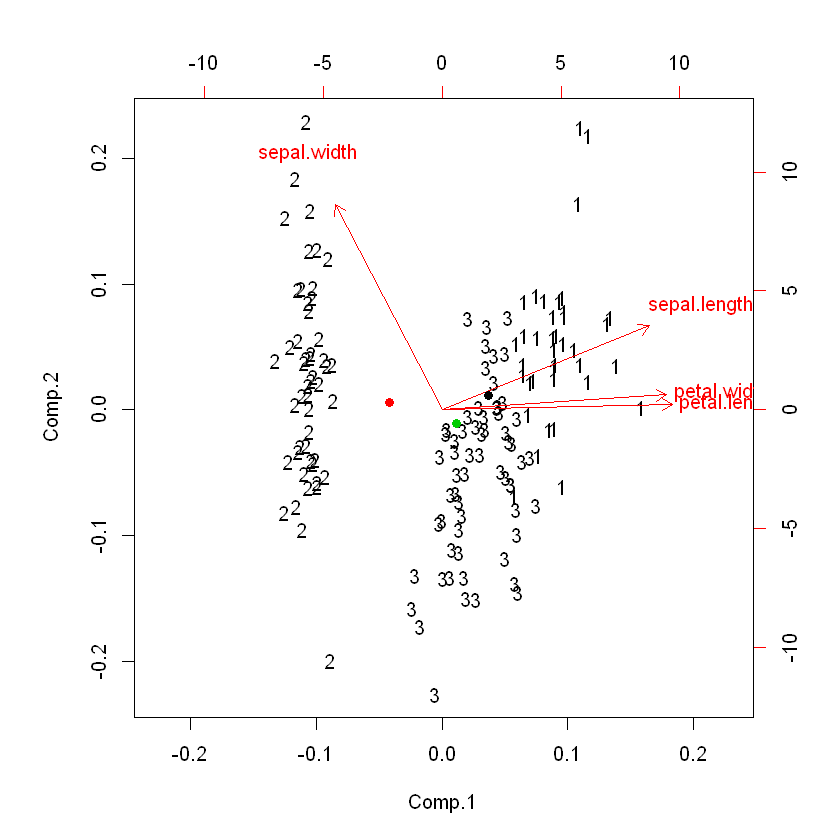

In [8]:
d <-read.table("iris.csv",sep=";",dec=",",header=TRUE)
d<-d[, 1:4]

k=3
cl<-kmeans(d,k,iter.max=1000,nstart=10)
pairs(d,col=cl$cluster)

res <- princomp(d, cor=TRUE)
res2 <- predict(res,cl$centers)
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k,pch=19)

#### Mclust

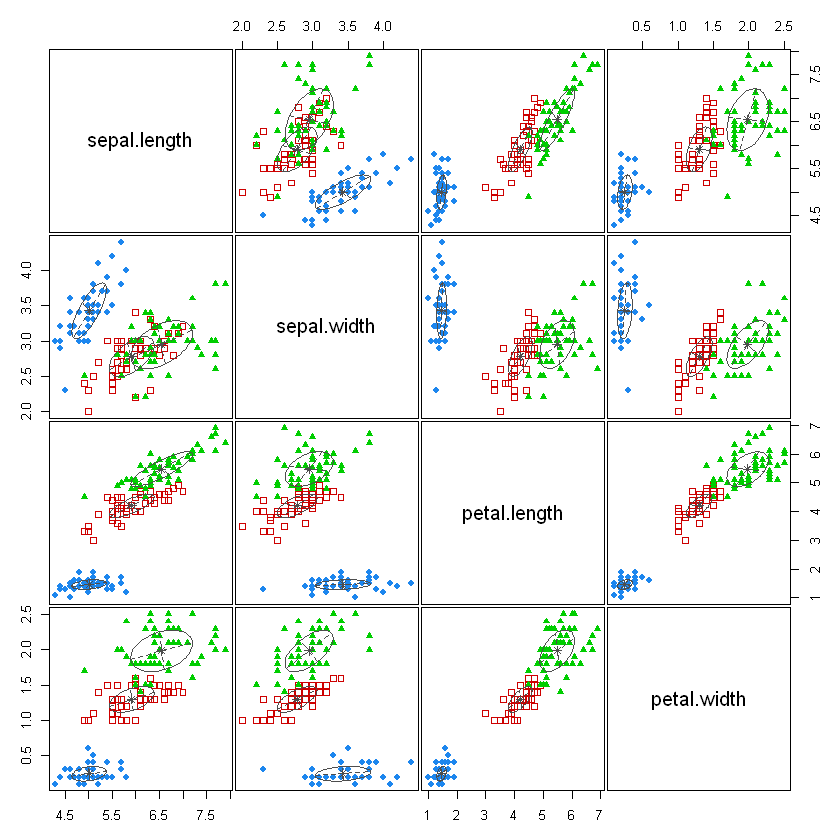

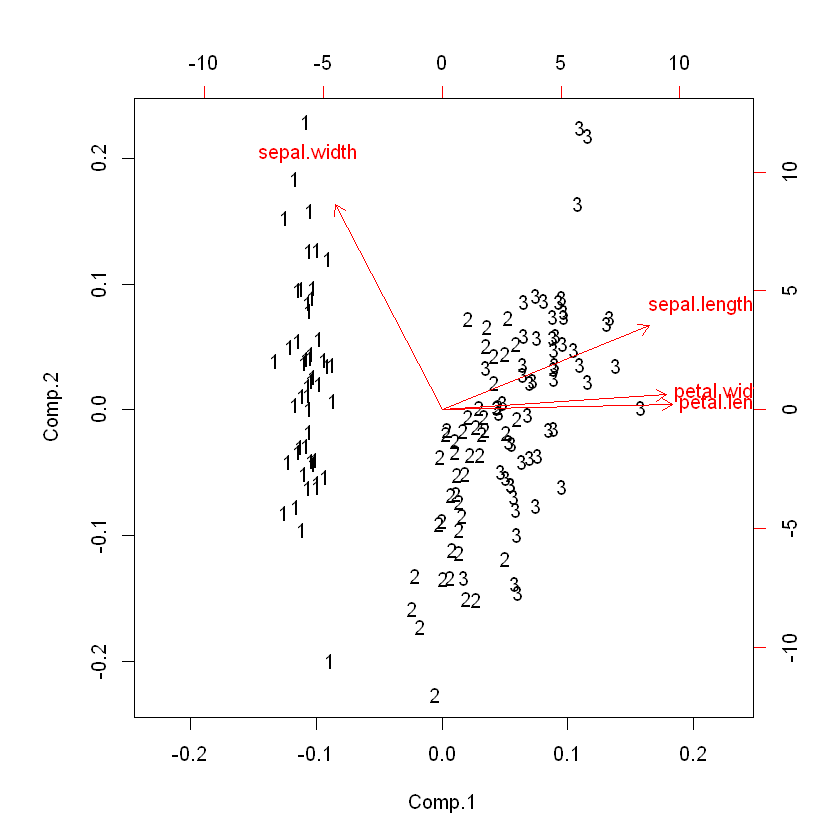

In [9]:
clus_ <-Mclust(d,3)
plot(clus_, what="classification")

cl_ <- clus_$classification
centers_ <- t(clus_$parameters$mean)

res_ <- princomp(d, cor=TRUE)
res2_ <- predict(res_,centers_)

biplot(res_,xlabs=cl_)

#### Hclust

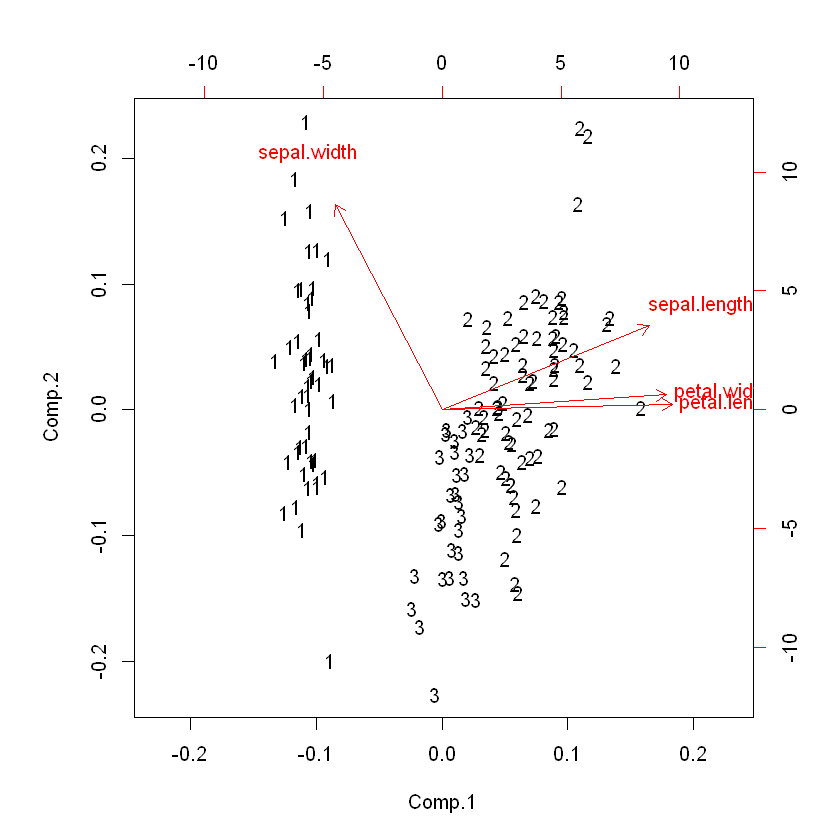

In [10]:
r_ <- hclust(dist(d))
biplot(res, xlabs= cutree(r_,3))
r2_ <- cutree(r_,3)

    Podemos identificar que si comparamos los 3 métodos utilizando la misma cantidad de grupos (3) los resultados son similares,por lo que utilizando las gráficas no podemos concluir con certeza cual de los métodos es mas efectivo, por lo que se tendrá que proceder a identificar a través de otras eurísticas (Purity) que tan eficiente clasifica cada uno de estos.

    4b) Purity

In [11]:
purity <- function(clust, total, k){
    cuota <- total / k
    l_ <- rep(0,k)
    suma<-0
    t<- 0
    l<-1
    for(j in l:k){
        for (i in 1:(cuota)){
            for (p in 1:k){
                if(clust[l]==p){
                    l_[p] = sum(l_[p],1)
                }
            }
            l = l+1
        }
        for (p in 1:k){
            if (p==1){
                t = l_[p]
            }
            else{
                if(l_[p] > l_[p-1]){
                    t = l_[p]
                }
            }
        }
        suma <- suma + t
        l_ <- rep(0,k)
    }
    return(suma/total)

}


cat("K-means: ", purity(cl$cluster, dim(d)[1], k), "\n")
cat("GMM: ", purity(clus_$classification, dim(d)[1], k), "\n")
cat("Análisis jerárquico: ", purity(r2_, dim(d)[1], k), "\n")

K-means:  0.7466667 
GMM:  0.9666667 
Análisis jerárquico:  0.84 


    Tras obtener los resultados se puede apreciar que el método que mejor agrupa a los elementos del dataset es GMM, seguido de K-Means y como último queda el Análisis jerárquico, bajo los criterios de purity.